- Fashion MNIST with minimum size for VGG16 (32x32) and standardization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

train_images = np.asarray([img_to_array(array_to_img(im).resize((32,32))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im).resize((32,32))) for im in test_images])

# Data standardization
train_images = (train_images - train_images.mean(axis=(1,2)).reshape((train_images.shape[0],1,1,train_images.shape[-1]))) / \
                train_images.std(axis=(1, 2)).reshape((train_images.shape[0],1,1,train_images.shape[-1]))
test_images  = (test_images - test_images.mean(axis=(1,2)).reshape((test_images.shape[0],1,1,test_images.shape[-1]))) / \
                test_images.std(axis=(1, 2)).reshape((test_images.shape[0],1,1,test_images.shape[-1]))

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
weight_decay = 1e-4

# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_sparse_categorical_accuracy') > 0.938):
      print("\nReached 93.8% accuracy so cancelling training!")
      self.model.stop_training = True

# model
def VGG_16():
    model = keras.models.Sequential()

     # Block 1
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay), 
                                         input_shape=(32,32, 1)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.1))

    # Block 2
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 3
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 4
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))


    # Block 5
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.8))

    # FCLs
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2( weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(32, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.7))
    model.add(keras.layers.Dense(10, activation='softmax',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))

    return model

vgg16 = VGG_16()
vgg16.summary()

vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = vgg16.fit(train_images, train_labels, epochs=200, batch_size=2048, 
                    validation_split=0.1, callbacks=[myCallback()])

# testing
test_loss, test_acc = vgg16.evaluate(test_images, test_labels, verbose=0)
print('\n\nTest accuracy:', test_acc)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_533 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_611 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_534 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_612 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_205 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_282 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_535 (Conv2D)          (None, 16, 16, 128)     

The test accuracy increased just about 0.5% in comparison with my model with pure CNN layers (without Max Pooling and utilizing strides) in the assignment 10. However it took much longer to train.

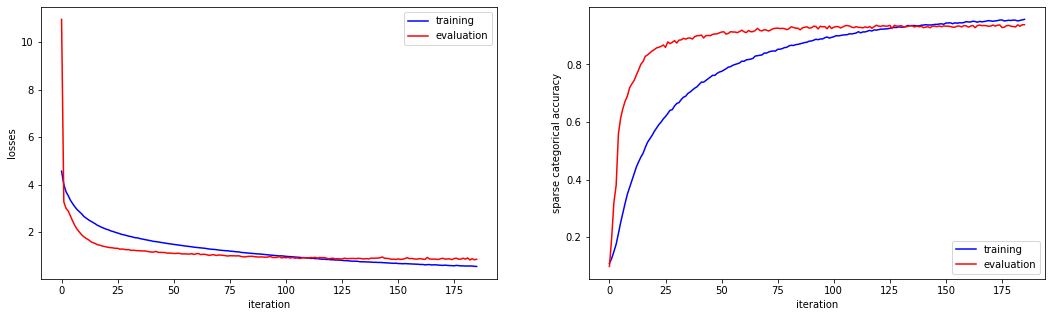

In [ ]:
import matplotlib.pyplot as plt

# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()

- Fashion MNIST with minimum size for VGG16 (32x32) and normalization

In [ ]:
weight_decay = 1e-4

# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_sparse_categorical_accuracy') > 0.938):
      print("\nReached 93.8% accuracy so cancelling training!")
      self.model.stop_training = True

# model
def VGG_16():
    model = keras.models.Sequential()

     # Block 1
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay), 
                                         input_shape=(32,32, 1)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.1))

    # Block 2
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 3
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 4
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))


    # Block 5
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.8))

    # FCLs
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2( weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(32, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.7))
    model.add(keras.layers.Dense(10, activation='softmax',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))

    return model

vgg16 = VGG_16()
vgg16.summary()

vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = vgg16.fit(train_images, train_labels, epochs=200, batch_size=2048, 
                    validation_split=0.1, callbacks=[myCallback()])

# testing
test_loss, test_acc = vgg16.evaluate(test_images, test_labels, verbose=0)
print('\n\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

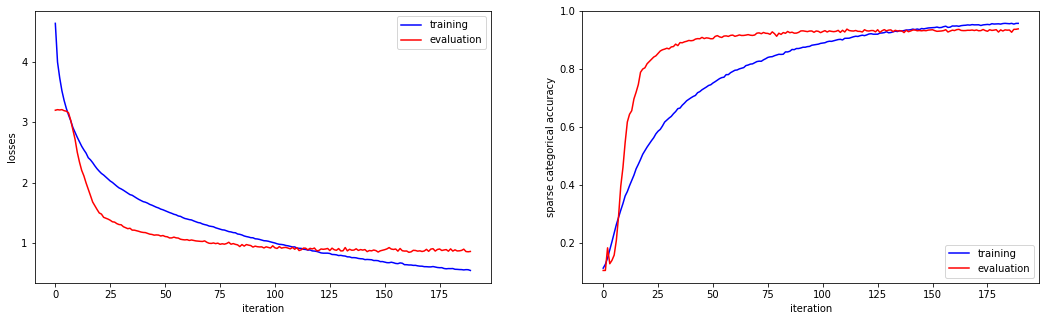

In [ ]:
import matplotlib.pyplot as plt

# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()

- Fashion MNIST with default size 224x224 for VGG16

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np
import math

# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
test_images  = tf.reshape(test_images, (10000, 28, 28, 1))

train_images = np.asarray([img_to_array(array_to_img(im).resize((224,224))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im).resize((224,224))) for im in test_images])

In [ ]:
# Data standardization
def standardize(images):
  CHUNK_SIZE = 1000
  for idx in range(math.ceil(images.shape[0]/CHUNK_SIZE)):
      sl = slice(idx*CHUNK_SIZE, (idx+1)*CHUNK_SIZE)
      images[sl] = (images[sl] - images[sl].mean(axis=(1,2)).reshape((images[sl].shape[0],1,1,images[sl].shape[-1]))) / \
                images[sl].std(axis=(1, 2)).reshape((images[sl].shape[0],1,1,images[sl].shape[-1]))

In [ ]:
standardize(train_images)
standardize(test_images)

In [ ]:
weight_decay = 1e-4

# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_sparse_categorical_accuracy') > 0.938):
      print("\nReached 93.8% accuracy so cancelling training!")
      self.model.stop_training = True

# model
def VGG_16():
    model = keras.models.Sequential()

     # Block 1
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay), 
                                         input_shape=(224,224,1)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 2
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 3
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # Block 4
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))


    # Block 5
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))

    # FCLs
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(4096, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2( weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(4096, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))

    return model

vgg16 = VGG_16()
vgg16.summary()

vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = vgg16.fit(train_images, train_labels, epochs=20, batch_size=80,
                    validation_split=0.1, callbacks=[myCallback()])

# testing
test_loss, test_acc = vgg16.evaluate(test_images, test_labels, verbose=0)
print('\n\nTest accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

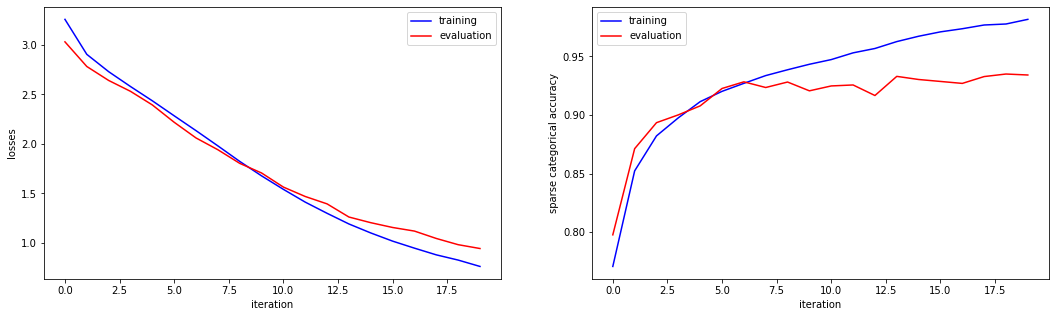

In [ ]:
import matplotlib.pyplot as plt

# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()

- CIFAR10 with Data Augmentation

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

# Data Preparation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

In [41]:
#data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    zoom_range=0.1,
    validation_split=0.1)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).

datagen.fit(train_images)

In [42]:
weight_decay = 1e-4

# model
def VGG_16():
    model = keras.models.Sequential()

     # Block 1
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay), 
                                         input_shape=(32,32, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(64, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

    # Block 2
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(128, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

    # Block 3
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(256, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

    # Block 4
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))

    # Block 5
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Convolution2D(512, 3, padding='same', 
                                         activation='relu',
                                         kernel_initializer=keras.initializers.HeNormal(),
                                         kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.5))

    # FCLs
    model.add(keras.layers.Flatten())
    # model.add(keras.layers.Dense(512, activation='relu',
    #                              kernel_initializer=keras.initializers.HeNormal(),
    #                              kernel_regularizer=keras.regularizers.l2(weight_decay)))
    # model.add(keras.layers.BatchNormalization())
    # model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(512, activation='relu',
                                 kernel_initializer=keras.initializers.HeNormal(),
                                 kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

vgg16 = VGG_16()
vgg16.summary()

vgg16.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = vgg16.fit(datagen.flow(train_images, train_labels, batch_size=512, subset="training"),
                    steps_per_epoch=train_images.shape[0]*0.9 // 512,
                    epochs=200,
                    validation_data=datagen.flow(train_images, train_labels, batch_size=512, subset="validation"))
# testing
test_loss, test_acc = vgg16.evaluate(test_images, test_labels, verbose=0)
print('\n\nTest accuracy:', test_acc)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_286 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_302 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_196 (Dropout)        (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_287 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_303 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 16, 16, 128)     

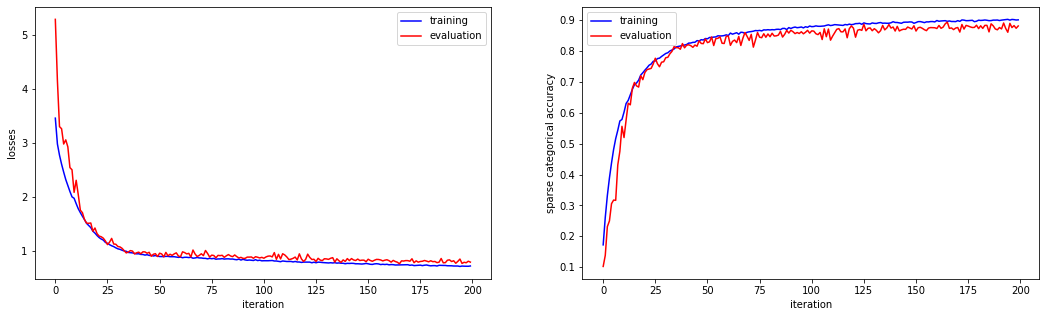

In [43]:
import matplotlib.pyplot as plt

# plotting 
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].plot(history.history['loss'], color='b', label='training')
axs[0].set(xlabel='iteration', ylabel='losses')
axs[0].plot(history.history['val_loss'], color='r', label='evaluation')
axs[0].legend()
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='training')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='evaluation')
axs[1].set(xlabel='iteration', ylabel='sparse categorical accuracy')
axs[1].legend()